In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from nltk import word_tokenize
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import os
import random
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score


In [2]:
news_dir = './dataset/bagidata_task/News Title.xls'
spam_dir = './dataset/bagidata_task/Comment Spam.xls'

## export data

In [23]:
spam_df = pd.read_excel(spam_dir)
spam_df

,No,Comment,Class
0,1,this song is racist,0
1,2,and how many subscribers compared to her over ...,1
2,3,HI! CHECK OUT OUR AWESOME COVERS! AND SAY WHAT...,1
3,4,well done shakira,0
4,5,:D subscribe to me for daily vines,1
...,...,...,...
1295,1296,Awsome<br />﻿,0
1296,1297,https://www.tsu.co/KodysMan plz ^^﻿,1
1297,1298,Sign up for free on TSU and start making money...,1
1298,1299,MEGAN FOX AND EMINEM TOGETHER IN A VIDEO DOES...,0


In [24]:
spam_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   No       1300 non-null   int64 
 1   Comment  1300 non-null   object
 2   Class    1300 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 30.6+ KB


In [25]:
spam_df = spam_df.drop(columns=['No'])

In [26]:
spam_df.isna().sum()

Comment    0
Class      0
dtype: int64

<AxesSubplot:xlabel='Class', ylabel='count'>

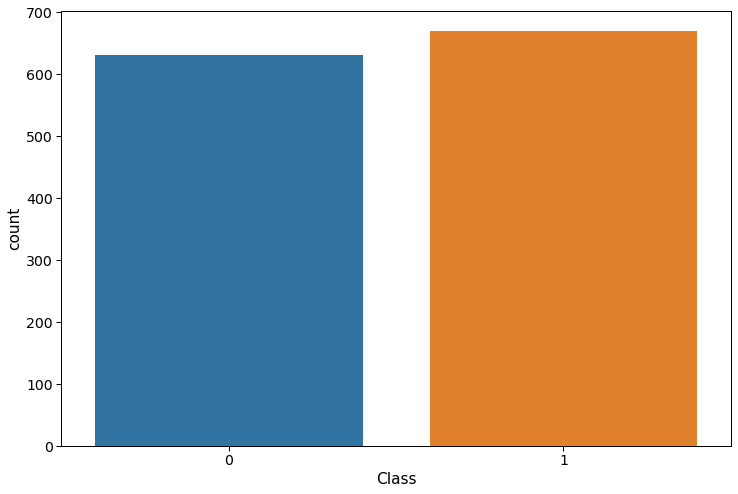

In [27]:
plt.figure(figsize=(12,8))
sns.set_context('paper',font_scale=1.6)
sns.countplot(x='Class', data=spam_df)

## word cloud

In [28]:
def word_cloud(df, text_column, category_code_column, category_code):
    topic = df[text_column][df[category_code_column] == category_code].values
    topic_words = ''
    for statement in topic:
        text = statement.lower()
        token = word_tokenize(text)
        for word in token:
            topic_words = topic_words + word + ' '
            
    topic_word_cloud = WordCloud(width=600, height=400).generate(topic_words)
    return topic_word_cloud

In [29]:
code_relation = {
    'not spam' : 0,
    'spam' : 1
}
dict_word_cloud = dict()
for category, code in code_relation.items():    
    wc = word_cloud(spam_df,'Comment','Class',code)
    dict_word_cloud[category] = wc

word cloud not spam


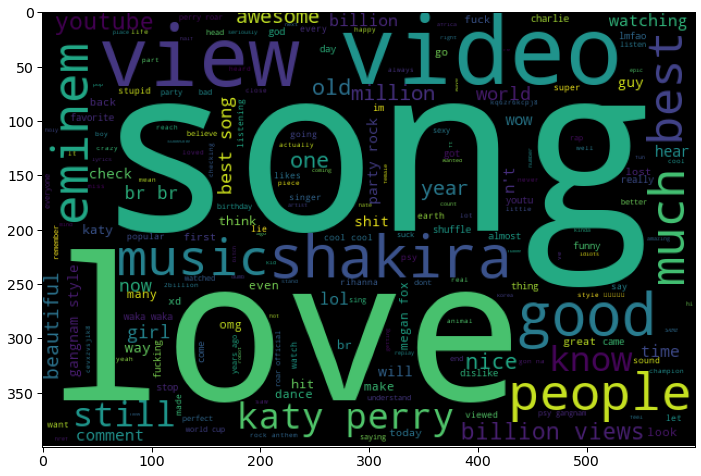

In [30]:
print('word cloud not spam')
plt.figure(figsize=(13,8))
plt.imshow(dict_word_cloud['not spam'])

word cloud spam


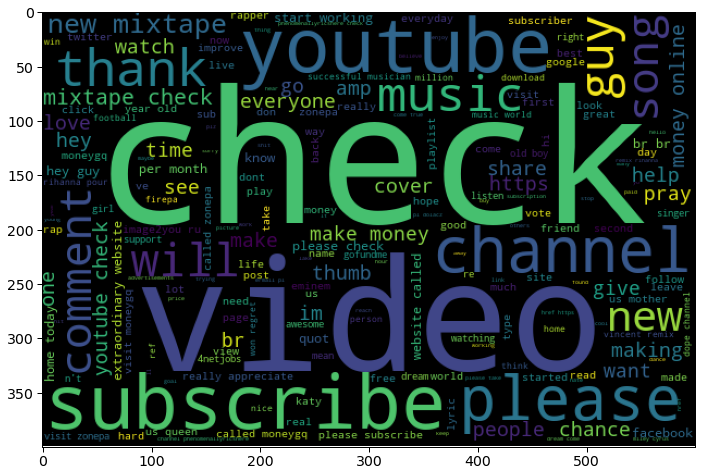

In [31]:
print('word cloud spam')
plt.figure(figsize=(13,8))
plt.imshow(dict_word_cloud['spam'])

In [32]:
spam_df['Comment Length'] = spam_df['Comment'].apply(lambda x: len(x))
spam_df

,Comment,Class,Comment Length
0,this song is racist,0,19
1,and how many subscribers compared to her over ...,1,55
2,HI! CHECK OUT OUR AWESOME COVERS! AND SAY WHAT...,1,57
3,well done shakira,0,17
4,:D subscribe to me for daily vines,1,34
...,...,...,...
1295,Awsome<br />﻿,0,13
1296,https://www.tsu.co/KodysMan plz ^^﻿,1,35
1297,Sign up for free on TSU and start making money...,1,129
1298,MEGAN FOX AND EMINEM TOGETHER IN A VIDEO DOES...,0,70


<AxesSubplot:xlabel='Class', ylabel='Comment Length'>

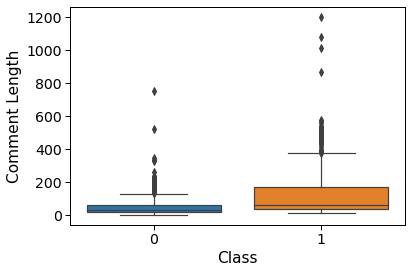

In [33]:
sns.boxplot(x='Class',y='Comment Length',data=spam_df)

In [34]:
vectorizer = TfidfVectorizer()
comment_vector = vectorizer.fit_transform(spam_df['Comment'])
comment_vector.shape

(1300, 3313)

In [35]:
X_train,X_test,Y_train,Y_test = train_test_split(
    comment_vector, spam_df['Class'],test_size=0.2)

## trying some classifier

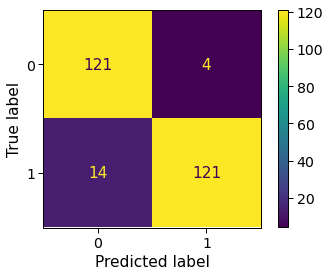

In [36]:
clf_lg = LogisticRegression().fit(X_train,Y_train)
plot_confusion_matrix(clf_lg, X_test, Y_test)
plt.show()

In [37]:
predict_lg = clf_lg.predict(X_test)
accuracy_score(Y_test, predict_lg)

0.9307692307692308

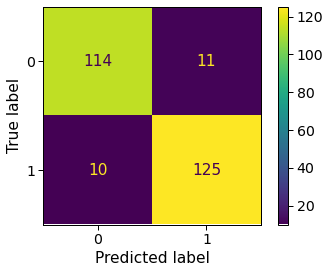

In [38]:
clf_nb=MultinomialNB().fit(X_train,Y_train)
plot_confusion_matrix(clf_nb, X_test, Y_test)
plt.show()

In [39]:
predict_nb = clf_nb.predict(X_test)
accuracy_score(Y_test, predict_nb)

0.9192307692307692

## testing real comment

In [40]:
# get from https://brodiesnotes.blogspot.com/p/all-spam-comments.html
spam_comment = '''
 It's really a great and helpful piece of info.

I'm glad that you simply shared this useful info with us.
Please stay us up to date like this. Thanks for sharing.

my webpage: James Burngasser [links to ht tp://twe etcartel.net]
'''

# get from youtube
not_spam_comment = '''
Fred Rogers was so real.  He wasn't playing a character.  He was totally himself.  He was the same person off the set as he was on it.  That's what kids loved about his show.  It was honest and loving with everyone.
'''

list_comment = [spam_comment, not_spam_comment]

In [42]:
real_input = vectorizer.transform(list_comment)
prediction = clf_lg.predict(real_input)
for x in prediction:
    if x == 1:
        print('spam')
    else:
        print('not spam')

spam
not spam


## thank you